In [1]:
import copy
import matplotlib.pyplot as plt
import astropy.units as units
%load_ext autoreload

In [2]:
%config InlineBackend.figure_format = 'retina'
# from astropy.visualization import quantity_support
# quantity_support()

In [3]:
%autoreload 2
import pyfcctab

In [4]:
tables = pyfcctab.read()

Reading tables: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, done.
Digesting: R1, R2, R3, F, NF, done.
Injecting additions in: ITU-R1, ITU-R2, ITU-R3, F, NF, done.
Merging: ITU, USA, all, done.
Footnote definitions: reading, appending, done.


In [5]:
fixed = tables.itu.stitch(
    lambda band: band.has_allocation("Fixed*", but_not="Fixed-Satellite*", primary=True))
fixed.metadata["label"] = "Fixed"

eess = tables.itu.stitch(
    lambda band: band.has_allocation("Earth Exploration-Satellite (Passive)*"))
eess.metadata["label"] = "EESS (Passive)"

ras = tables.itu.stitch(
    lambda band: band.has_allocation("Radio Astronomy*"))
ras.metadata["label"] = "RAS"

aep = tables.itu.stitch(
    lambda band: band.has_footnote("5.340*"))
aep.metadata["label"] = "5.340"

In [6]:
# Fix the 5.340 at 48.2-50.2
aep_patched = copy.deepcopy(aep)
b = aep_patched[48.3*units.GHz][0]
b.bounds = [ 48.94*units.GHz, 49.04*units.GHz ]
extra = copy.deepcopy(b)
extra.bounds = [50.2*units.GHz, 50.4*units.GHz]
aep_patched.append(extra)
print (aep_patched[48.3*units.GHz])

[<Band 48.94 GHz-49.04 GHz [ITU Region 1, ITU Region 2, ITU Region 3] ;EARTH EXPLORATION-SATELLITE (passive);FIXED;FIXED-SATELLITE (Earth-to-space) 5.338A 5.516B 5.552;FIXED-SATELLITE (Earth-to-space) 5.552;MOBILE;RADIO ASTRONOMY 5.555#;SPACE RESEARCH (passive);Radio astronomy 5.149#;;5.149 5.340 5.555>]


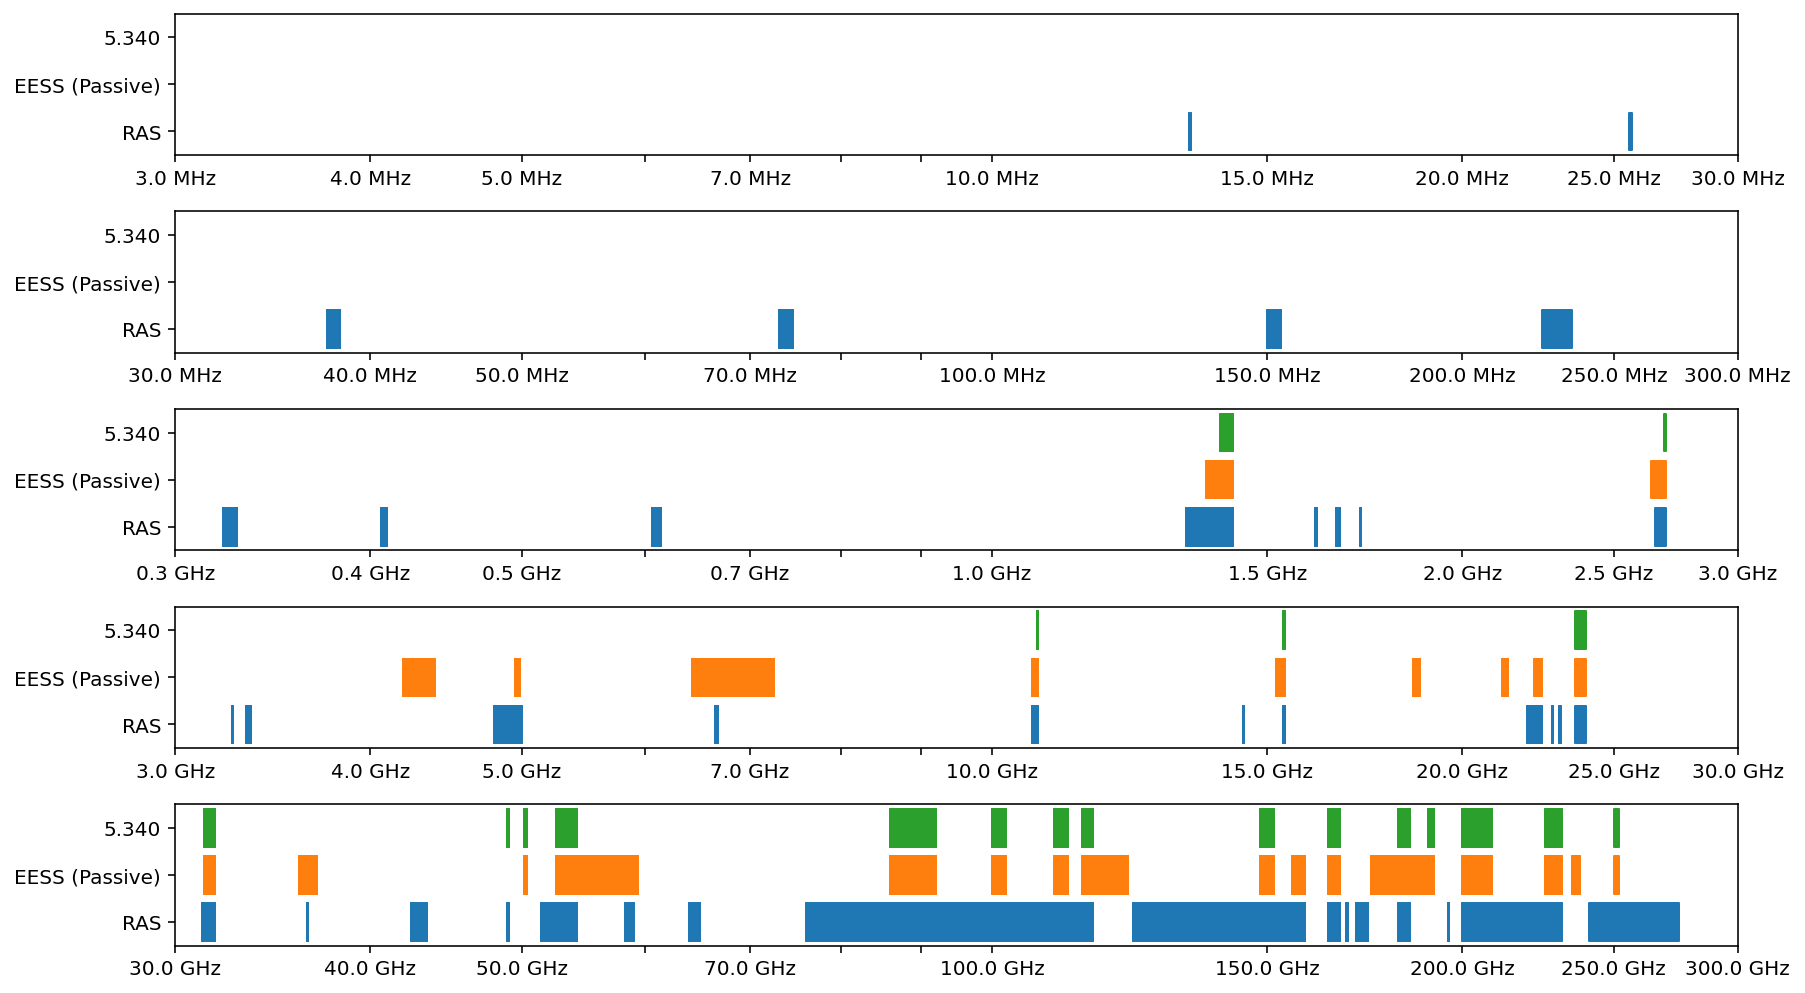

In [9]:
pyfcctab.plot_bands(ras, eess, aep_patched, skip_empty=True)
plt.savefig("ai91c.pdf")

In [8]:
for b in aep:
    print ('==============')
    print (b)

1400.0 MHz-1427.0 MHz [ITU Region 1, ITU Region 2, ITU Region 3] 
EARTH EXPLORATION-SATELLITE (passive)
RADIO ASTRONOMY
SPACE RESEARCH (passive)

5.340 5.341
2690.0 MHz-2700.0 MHz [ITU Region 1, ITU Region 2, ITU Region 3] 
EARTH EXPLORATION-SATELLITE (passive)
RADIO ASTRONOMY
SPACE RESEARCH (passive)

5.340 5.422
10.68 GHz-10.7 GHz [ITU Region 1, ITU Region 2, ITU Region 3] 
EARTH EXPLORATION-SATELLITE (passive)
RADIO ASTRONOMY
SPACE RESEARCH (passive)

5.340 5.483
15.35 GHz-15.4 GHz [ITU Region 1, ITU Region 2, ITU Region 3] 
EARTH EXPLORATION-SATELLITE (passive)
RADIO ASTRONOMY
SPACE RESEARCH (passive)

5.340 5.511
23.6 GHz-24.0 GHz [ITU Region 1, ITU Region 2, ITU Region 3] 
EARTH EXPLORATION-SATELLITE (passive)
RADIO ASTRONOMY
SPACE RESEARCH (passive)

5.340
31.3 GHz-31.8 GHz [ITU Region 1, ITU Region 2, ITU Region 3] 
EARTH EXPLORATION-SATELLITE (passive)
RADIO ASTRONOMY
SPACE RESEARCH (passive)

5.340
48.2 GHz-50.4 GHz [ITU Region 1, ITU Region 2, ITU Region 3] 
EARTH EXPLORATIO